In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import datetime, warnings, scipy 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('year2000(1) (1).csv')
df.tail()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,Origin,Dest,Distance,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass,CRSDepTimeE,MONTH,FlightStatus
545318,550340,2000,11,5,4,900,2,WN,833,105,...,DTW,MCI,629.0,NO,NO,0,0,2,Nov,0
545319,550341,2000,11,6,5,900,2,WN,833,105,...,DTW,MCI,629.0,NO,NO,0,0,2,Nov,0
545320,550342,2000,11,7,6,900,2,WN,833,105,...,DTW,MCI,629.0,NO,NO,0,0,2,Nov,0
545321,550343,2000,11,8,7,900,2,WN,833,106,...,DTW,MCI,629.0,NO,NO,0,0,2,Nov,0
545322,550344,2000,11,9,1,900,2,WN,833,107,...,DTW,MCI,629.0,NO,NO,0,0,2,Nov,0


In [3]:
df.shape

(545323, 23)

In [4]:
df['ActualElapsedTime']=df['ActualElapsedTime'].astype(int)
df['ArrDelay']=df['ArrDelay'].astype(int)
df['DepDelay']=df['DepDelay'].astype(int)
df['Distance']=df['Distance'].astype(int)

In [5]:
df.dtypes

Unnamed: 0            int64
Year                  int64
Month                 int64
DayofMonth            int64
DayOfWeek             int64
CRSDepTime            int64
CRSArrTime            int64
UniqueCarrier        object
FlightNum             int64
ActualElapsedTime     int64
CRSElapsedTime        int64
ArrDelay              int64
DepDelay              int64
Origin               object
Dest                 object
Distance              int64
IsArrDelayed         object
IsDepDelayed         object
ArrDelClass           int64
DepDelClass           int64
CRSDepTimeE           int64
MONTH                object
FlightStatus          int64
dtype: object

In [6]:
le = LabelEncoder()

In [7]:
df['UniqueCarrier']= le.fit_transform(df['UniqueCarrier'])
df['Origin']= le.fit_transform(df['Origin'])
df['Dest']= le.fit_transform(df['Dest'])
df['IsArrDelayed ']= le.fit_transform(df['IsArrDelayed'])
df['IsDepDelayed ']= le.fit_transform(df['IsDepDelayed'])

In [8]:
df.dtypes

Unnamed: 0            int64
Year                  int64
Month                 int64
DayofMonth            int64
DayOfWeek             int64
CRSDepTime            int64
CRSArrTime            int64
UniqueCarrier         int64
FlightNum             int64
ActualElapsedTime     int64
CRSElapsedTime        int64
ArrDelay              int64
DepDelay              int64
Origin                int64
Dest                  int64
Distance              int64
IsArrDelayed         object
IsDepDelayed         object
ArrDelClass           int64
DepDelClass           int64
CRSDepTimeE           int64
MONTH                object
FlightStatus          int64
IsArrDelayed          int64
IsDepDelayed          int64
dtype: object

In [9]:
df = df.replace({'IsArrDelayed': {'YES': 1, 
                                'NO': 0}})
  
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,Distance,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass,CRSDepTimeE,MONTH,FlightStatus,IsArrDelayed,IsDepDelayed
0,0,2000,10,14,3,730,2,9,1451,91,...,447,1,YES,1,1,2,Oct,1,1,1
1,1,2000,10,15,4,730,2,9,1451,94,...,447,1,NO,1,0,2,Oct,1,1,0
2,2,2000,10,17,6,730,2,9,1451,97,...,447,1,YES,1,1,2,Oct,1,1,1
3,3,2000,10,18,7,730,2,9,1451,78,...,447,0,NO,0,0,2,Oct,0,0,0
4,4,2000,10,19,1,730,2,9,1451,93,...,447,1,YES,1,1,2,Oct,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545318,550340,2000,11,5,4,900,2,13,833,105,...,629,0,NO,0,0,2,Nov,0,0,0
545319,550341,2000,11,6,5,900,2,13,833,105,...,629,0,NO,0,0,2,Nov,0,0,0
545320,550342,2000,11,7,6,900,2,13,833,105,...,629,0,NO,0,0,2,Nov,0,0,0
545321,550343,2000,11,8,7,900,2,13,833,106,...,629,0,NO,0,0,2,Nov,0,0,0


In [10]:
df = df.replace({'IsDepDelayed': {'YES': 1, 
                                'NO': 0}})
  
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,Distance,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass,CRSDepTimeE,MONTH,FlightStatus,IsArrDelayed,IsDepDelayed
0,0,2000,10,14,3,730,2,9,1451,91,...,447,1,1,1,1,2,Oct,1,1,1
1,1,2000,10,15,4,730,2,9,1451,94,...,447,1,0,1,0,2,Oct,1,1,0
2,2,2000,10,17,6,730,2,9,1451,97,...,447,1,1,1,1,2,Oct,1,1,1
3,3,2000,10,18,7,730,2,9,1451,78,...,447,0,0,0,0,2,Oct,0,0,0
4,4,2000,10,19,1,730,2,9,1451,93,...,447,1,1,1,1,2,Oct,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545318,550340,2000,11,5,4,900,2,13,833,105,...,629,0,0,0,0,2,Nov,0,0,0
545319,550341,2000,11,6,5,900,2,13,833,105,...,629,0,0,0,0,2,Nov,0,0,0
545320,550342,2000,11,7,6,900,2,13,833,105,...,629,0,0,0,0,2,Nov,0,0,0
545321,550343,2000,11,8,7,900,2,13,833,106,...,629,0,0,0,0,2,Nov,0,0,0


In [11]:
df = df.drop(['MONTH'], axis=1)

In [12]:
df[df['ArrDelay']==1].shape[0]/df.shape[0]

0.03600251594009422

This means if we randomly guessed a flight would be late on arrival, 3.6% of the time we would be correct and 96.59% would mean that a flight would not be late if you guessed.  


In [13]:
y = df['FlightStatus']
X = df.drop(['FlightStatus'], axis = 1)

In [14]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 
print(len(X_train))
print(len(X_test))

408992
136331


In [15]:
sc_X=StandardScaler()
X_train_sc=sc_X.fit_transform(X_train)
X_test_sc=sc_X.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


/Users/temiladeaderibigbe/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [17]:
# To Predict the Test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix
score = classifier.score(X_test,y_test)
cm = confusion_matrix(y_test, y_pred)

In [18]:
cm

array([[26378, 23497],
       [14277, 72179]])

In [19]:
score



0.7229243532285393

In [20]:
print(f1_score(y_test, y_pred, average="macro"))

0.6876735108786681


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [22]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.65      0.53      0.58     49875
           1       0.75      0.83      0.79     86456

    accuracy                           0.72    136331
   macro avg       0.70      0.68      0.69    136331
weighted avg       0.72      0.72      0.72    136331


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,26378,23497,49875
1,14277,72179,86456
All,40655,95676,136331


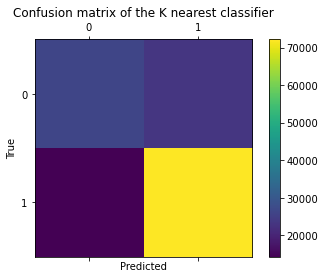

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix of the Logistic Regression Classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [24]:
from sklearn.metrics import precision_score


In [25]:

print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))

F1 score : 0.6876735108786681
Precision Score : 0.7016181011160689
Recall Score : 0.6818730912828477


In [26]:
df = df[["Month", "DayofMonth", "DayOfWeek", "Origin", "Dest", "CRSDepTime", "ArrDelay"]]
df.isnull().sum()

Month         0
DayofMonth    0
DayOfWeek     0
Origin        0
Dest          0
CRSDepTime    0
ArrDelay      0
dtype: int64

In [27]:
import math

for index, row in df.iterrows():
    df.loc[index, 'CRSDepTime'] = math.floor(row['CRSDepTime'] / 100)
df.head()

,Month,DayofMonth,DayOfWeek,Origin,Dest,CRSDepTime,ArrDelay
0,10,14,3,194,203,7,23
1,10,15,4,194,203,7,14
2,10,17,6,194,203,7,29
3,10,18,7,194,203,7,-2
4,10,19,1,194,203,7,33


In [28]:

df = pd.get_dummies(df, columns=['Origin', 'Dest'])
df.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrDelay,Origin_0,Origin_1,Origin_2,Origin_3,Origin_4,...,Dest_224,Dest_225,Dest_226,Dest_227,Dest_228,Dest_229,Dest_230,Dest_231,Dest_232,Dest_233
0,10,14,3,7,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,15,4,7,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,17,6,7,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,18,7,7,-2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,19,1,7,33,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    origin = origin.upper()
    destination = destination.upper()

    input = [{'Month': month,
              'DayOfMonth': day,
              'DayOfWeek': day_of_week,
              'CRSDepTime': hour,
              'ORIGIN_194': 1 if origin == '194' else 0,
              'ORIGIN_205': 1 if origin == '205' else 0,
              'ORIGIN_226': 1 if origin == '226' else 0,
              'ORIGIN_228': 1 if origin == '228' else 0,
              'ORIGIN_229': 1 if origin == '229' else 0,
              'DEST_194': 1 if destination == '194' else 0,
              'DEST_205': 1 if destination == '205' else 0,
              'DEST_226': 1 if destination == '226' else 0,
              'DEST_228': 1 if destination == '228' else 0,
              'DEST_229': 1 if destination == '229' else 0 }]

    return classifier.predict_proba(pd.DataFrame(input))[0][0]

In [38]:
predict_delay('5/11/2020', '194', '226')

ValueError: X has 14 features per sample; expecting 23